# Regression


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# import other libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_linear=df[["age","fare"]]

In [4]:
x = df[["age"]]
y = df["fare"]  

In [5]:
df_linear["age"]= df_linear["age"].fillna(df_linear["age"].mean())

/tmp/ipykernel_3940/1131679036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear["age"]= df_linear["age"].fillna(df_linear["age"].mean())


In [6]:
df_linear.isnull().sum()/  len(df_linear) *100


age     0.0
fare    0.0
dtype: float64

In [7]:
y.isnull().sum()/ len(y) *100

0.0

In [8]:
x.shape
y.shape


(891,)

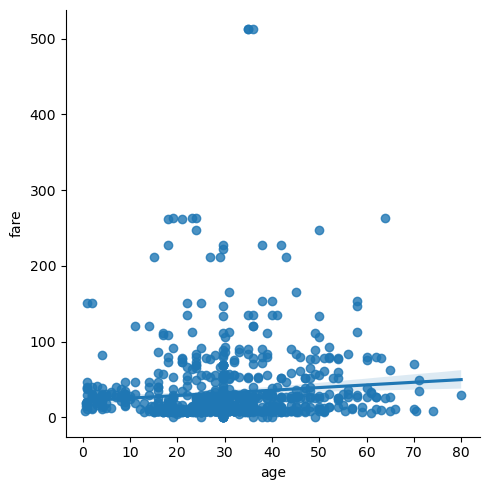

In [9]:
sns.lmplot(data=df_linear, x="age",y="fare")

<AxesSubplot: ylabel='age'>

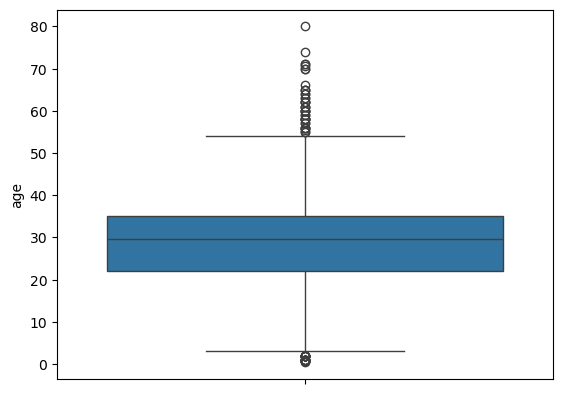

In [10]:
sns.boxplot(data=df_linear, y="age")

In [11]:
# for removing outliers
df_linear=df_linear[(df_linear["age"]>10 )&(df_linear["age"] <50)]

<AxesSubplot: ylabel='age'>

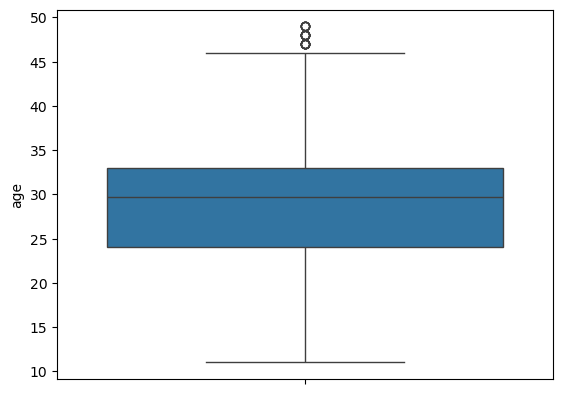

In [12]:
sns.boxplot(data = df_linear, y= "age")

<AxesSubplot: xlabel='fare'>

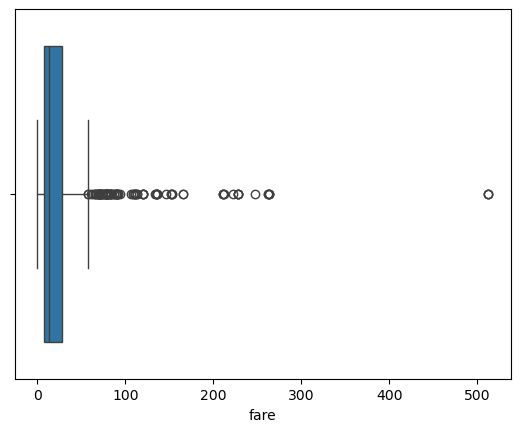

In [13]:
sns.boxplot(data=df_linear,x="fare")

In [14]:
df_linear["fare"].head()
df_linear["fare"].describe()

count    753.000000
mean      30.963052
std       51.106132
min        0.000000
25%        7.895800
50%       13.000000
75%       27.900000
max      512.329200
Name: fare, dtype: float64

In [15]:
df_linear=df_linear[(df_linear["fare"]>1)& (df_linear["fare"]<55)]

<AxesSubplot: ylabel='fare'>

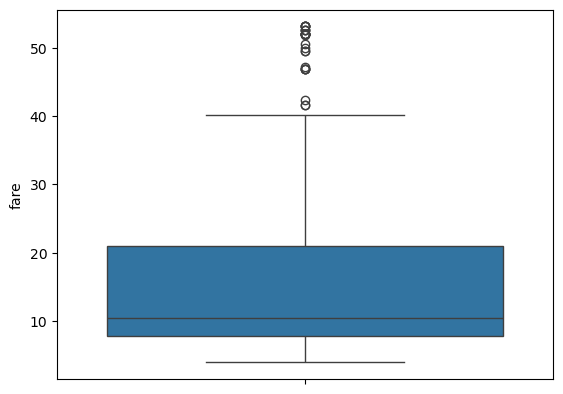

In [16]:
sns.boxplot(data=df_linear,y="fare" )

In [17]:
X = df_linear[["age"]]
y = df_linear["fare"]

In [18]:
model = LinearRegression()
# train model
model.fit(X,y)



LinearRegression()

In [19]:
model.predict([[52]])

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.55272799])

In [20]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.8)

#model
model=LinearRegression()
#Training of model
model.fit(x_test,y_test)
# predictions
predictions= model.predict(x_test)


<AxesSubplot: xlabel='fare'>

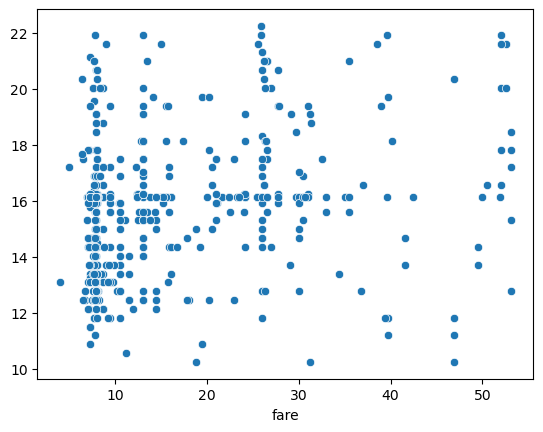

In [22]:
sns.scatterplot(x=y_test,y=predictions)

In [23]:
model.score(x_test,y_test)

0.04399106309666634

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE=mean_absolute_error(y_true=y_test,y_pred=predictions)
MSE=mean_squared_error(y_true=y_test,y_pred=predictions)
R2=r2_score(y_true=y_test,y_pred=predictions)




In [30]:
print("MAE=",MAE)
print("MSE=",MSE)
print("R2=",R2)

MAE= 8.587267765553024
MSE= 123.51547712293694
R2= 0.04399106309666634


In [34]:
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

11.113751712312856